<a href="https://colab.research.google.com/github/stevengregori92/VideoGames-with-Regression-SGDRegressor/blob/main/VideoGames_with_SGDRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [ ]:
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance

#Import Data

In [ ]:
data = pd.read_csv('Video_Games.csv')
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


#Explore Data

In [ ]:
data.groupby('Genre').mean()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Genre,,,,,,,,,
Action,2008.050181,0.260834,0.154045,0.047905,0.054777,0.517884,66.629101,27.780952,188.889617
Adventure,2008.263728,0.080783,0.048764,0.040138,0.012655,0.182417,65.331269,22.114551,103.410000
Fighting,2004.653524,0.263086,0.118174,0.103039,0.042827,0.527067,69.217604,27.909535,64.929825
Misc,2007.328298,0.232726,0.121566,0.061777,0.042509,0.458960,66.619503,21.533461,31.113895
Platform,2003.857631,0.501689,0.225619,0.147331,0.057534,0.932523,68.058350,23.698189,109.128505
Puzzle,2005.230228,0.211845,0.086224,0.098810,0.021345,0.419000,67.424107,20.308036,32.500000
Racing,2004.864600,0.287710,0.189359,0.045404,0.060929,0.583587,67.963612,23.028302,69.372855
Role-Playing,2007.130816,0.220540,0.125807,0.236973,0.039753,0.622933,72.652646,32.489824,320.746972
Shooter,2006.033179,0.447649,0.239864,0.029297,0.078692,0.795873,70.181144,35.610169,374.577922


#Cleaning Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
data = data.drop(['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating'], axis = 1)

In [ ]:
data['User_Score'] = data['User_Score'].str.replace('NaN', '0')
data['User_Score'] = data['User_Score'].str.replace('tbd', '0')

In [ ]:
data['User_Score'] = data['User_Score'].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_of_Release  16450 non-null  float64
 1   NA_Sales         16719 non-null  float64
 2   EU_Sales         16719 non-null  float64
 3   JP_Sales         16719 non-null  float64
 4   Other_Sales      16719 non-null  float64
 5   Global_Sales     16719 non-null  float64
 6   Critic_Score     8137 non-null   float64
 7   Critic_Count     8137 non-null   float64
 8   User_Score       10015 non-null  float64
 9   User_Count       7590 non-null   float64
dtypes: float64(10)
memory usage: 1.3 MB


In [ ]:
data

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0
1,1985.0,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0
4,1996.0,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
16714,2016.0,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN
16715,2006.0,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN
16716,2016.0,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN
16717,2003.0,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN


In [ ]:
data = data.fillna(0)

In [ ]:
data

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0
1,1985.0,29.08,3.58,6.81,0.77,40.24,0.0,0.0,0.0,0.0
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0
4,1996.0,11.27,8.89,10.22,1.00,31.37,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
16714,2016.0,0.00,0.00,0.01,0.00,0.01,0.0,0.0,0.0,0.0
16715,2006.0,0.00,0.01,0.00,0.00,0.01,0.0,0.0,0.0,0.0
16716,2016.0,0.00,0.00,0.01,0.00,0.01,0.0,0.0,0.0,0.0
16717,2003.0,0.01,0.00,0.00,0.00,0.01,0.0,0.0,0.0,0.0


In [ ]:
len(data)

16719

#Analayze

Global Sales

In [ ]:
X = data.drop(['Global_Sales'], axis = 1)
y = data['Global_Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [ ]:
stand = StandardScaler().fit(X_train)
X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

In [ ]:
score = []

trainX = [X_train, X_train_stand]
testX = [X_test, X_test_stand]

for X_train_set, X_test_set in zip(trainX, testX):
  sgd = SGDRegressor()
  sgd.fit(X_train_set, y_train)
  y_pred = sgd.predict(X_test_set)
  score.append(r2_score(y_test, y_pred))

In [ ]:
pd.DataFrame({'score':score}, index = ['Organised', 'Standardized'])

,score
Organised,-1.753149e+29
Standardized,9.999922e-01


In [ ]:
sgd = SGDRegressor()

sgd.fit(X_train_stand, y_train)
perm_importance = permutation_importance(sgd, X_test_stand, y_test)
perm_importance.importances

array([[ 2.09520913e-08,  1.40059468e-08, -4.63766969e-09,
        -7.50491669e-10,  5.12425768e-09],
       [ 4.99292452e-01,  4.99974456e-01,  4.94025688e-01,
         4.97041267e-01,  5.04600353e-01],
       [ 2.35948974e-01,  2.33366359e-01,  2.29305505e-01,
         2.29195126e-01,  2.33629618e-01],
       [ 5.35574312e-02,  5.35986039e-02,  5.29064409e-02,
         5.27143803e-02,  5.17248919e-02],
       [ 2.13590395e-02,  2.11818651e-02,  2.09334799e-02,
         2.11773303e-02,  2.10489660e-02],
       [ 8.62849088e-08,  7.31672261e-08,  9.81555909e-08,
         7.08427147e-08,  7.65878592e-08],
       [ 2.76988299e-09,  4.59984384e-10,  1.63835301e-09,
        -1.64099911e-09, -3.34990569e-09],
       [ 3.19523942e-08,  5.63066028e-08,  3.40963359e-08,
         5.90751338e-08,  4.40093305e-08],
       [-1.01814940e-08, -7.89030430e-09, -1.18687551e-08,
        -1.06102497e-08, -1.79842365e-08]])

<Axes: >

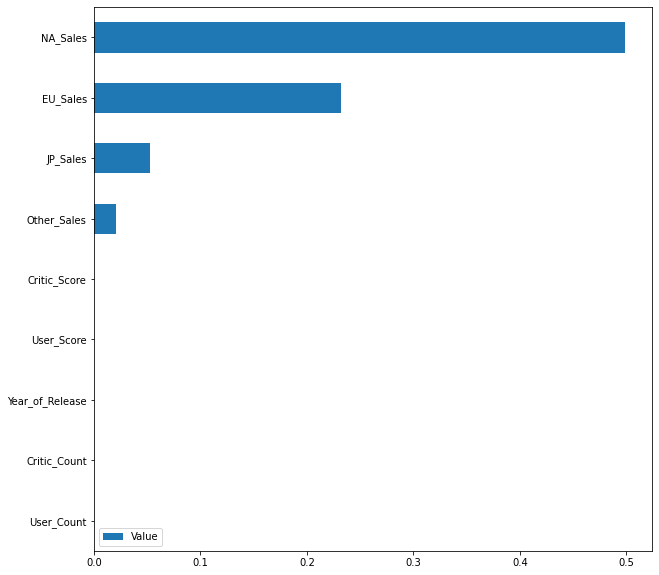

In [ ]:
sorted = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted], X_test.columns[sorted], columns = ['Value'])
df.plot.barh(figsize = (10,10))

Critic Score

In [ ]:
X = data.drop(['Critic_Score'], axis = 1)
y = data['Critic_Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [ ]:
stand = StandardScaler().fit(X_train)
X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

In [ ]:
score = []

trainX = [X_train, X_train_stand]
testX = [X_test, X_test_stand]

for X_train_set, X_test_set in zip(trainX, testX):
  sgd = SGDRegressor()
  sgd.fit(X_train_set, y_train)
  y_pred = sgd.predict(X_test_set)
  score.append(r2_score(y_test, y_pred))

In [ ]:
pd.DataFrame({'score':score}, index = ['Organised', 'Standardized'])

,score
Organised,-3.495845e+26
Standardized,7.339242e-01


In [ ]:
sgd = SGDRegressor()

sgd.fit(X_train_stand, y_train)
perm_importance = permutation_importance(sgd, X_test_stand, y_test)


<Axes: >

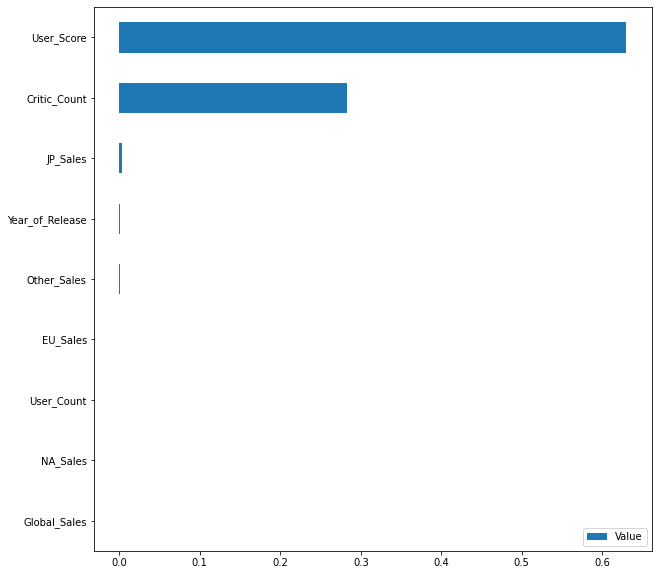

In [ ]:
sorted = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted], X_test.columns[sorted], columns = ['Value'])
df.plot.barh(figsize = (10,10))

User Score

In [ ]:
X = data.drop(['User_Score'], axis = 1)
y = data['User_Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [ ]:
stand = StandardScaler().fit(X_train)
X_train_stand = stand.transform(X_train)
X_test_stand = stand.transform(X_test)

In [ ]:
score = []

trainX = [X_train, X_train_stand]
testX = [X_test, X_test_stand]

for X_train_set, X_test_set in zip(trainX, testX):
  sgd = SGDRegressor()
  sgd.fit(X_train_set, y_train)
  y_pred = sgd.predict(X_test_set)
  score.append(r2_score(y_test, y_pred))

In [ ]:
pd.DataFrame({'score':score}, index = ['Organised', 'Standardized'])

,score
Organised,-3.795474e+28
Standardized,6.679753e-01


In [ ]:
sgd = SGDRegressor()

sgd.fit(X_train_stand, y_train)
perm_importance = permutation_importance(sgd, X_test_stand, y_test)

<Axes: >

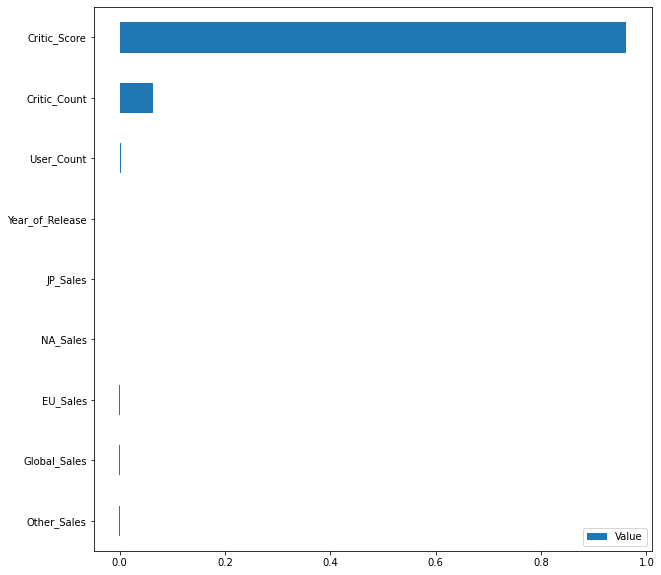

In [ ]:
sorted = perm_importance.importances_mean.argsort()
df = pd.DataFrame(perm_importance.importances_mean[sorted], X_test.columns[sorted], columns = ['Value'])
df.plot.barh(figsize = (10,10))

#Insights:
- Global Sales mostly influenced from NA_Sales.
- User Score has a very high correlation to one another.
- Here are some tips that can help you increase your sales:

  1. Understand your target market: It's essential to understand your target market to know what they want, their preferences, and their buying habits. This will help you tailor your marketing messages and offers to meet their needs and increase the chances of converting them into paying customers.

  2. Improve your product or service: Make sure your product or service is of high quality and offers value to your customers. Listen to their feedback and address any issues they may have to improve their experience.

  3. Provide excellent customer service: Your customer service can make or break your sales. Make sure you provide exceptional customer service to create a positive experience for your customers and encourage repeat business.

  4. Offer promotions and discounts: Offering promotions and discounts can attract new customers and encourage existing ones to make a purchase. Be strategic with your offers to ensure they align with your business goals.

  5. Invest in marketing: Marketing is crucial to attract new customers and retain existing ones. Consider investing in various marketing channels such as social media, email marketing, and paid advertising.

  6. Build relationships: Building relationships with your customers can help create brand loyalty and increase the chances of repeat business. Consider implementing a loyalty program or sending personalized emails to show your appreciation for their business.

  7. Analyze your sales data: Analyzing your sales data can help you identify patterns and trends in your business, allowing you to make data-driven decisions to improve your sales.